In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


READ AND SHOW DATA


In [17]:
dt=pd.read_csv('SFsalaries.csv',low_memory=False)
dt.sample(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
75607,75608,Troy P Peele,Police Officer 3,123471.11,38332.87,3968.19,37055.22,165772.17,202827.39,2013,NaN,San Francisco,NaN
26586,26587,STEFAN ARCELONA,SOCIAL WORKER,40827.8,0,0,NaN,40827.80,40827.80,2011,NaN,San Francisco,NaN
69386,69387,Yohance Chism,Pool Lifeguard,7909.29,0,80.62,619.28,7989.91,8609.19,2012,NaN,San Francisco,NaN
34579,34580,DANA HERRON,TRANSIT OPERATOR,2380.5,0,0,NaN,2380.50,2380.50,2011,NaN,San Francisco,NaN
133783,133784,Lily Kang,Legal Secretary 1,61050.84,0,498.72,24527.11,61549.56,86076.67,2014,NaN,San Francisco,PT
125112,125113,Monaz J Singh,Protective Services Worker,94691.01,0,199.81,22245.43,94890.82,117136.25,2014,NaN,San Francisco,FT
143750,143751,Mark White,Special Nurse,8767.15,0,382.54,1965.01,9149.69,11114.70,2014,NaN,San Francisco,PT
14537,14538,DILLON DUTTON,"SENIOR STATIONARY ENGINEER, SEWAGE PLANT",72377.17,2347.23,4987.58,NaN,79711.98,79711.98,2011,NaN,San Francisco,NaN
134676,134677,Zhihui Fan,Senior Laundry Worker,53121,2151.9,828.51,26519.6,56101.41,82621.01,2014,NaN,San Francisco,FT
148478,148479,Nelson A Solorzano,Museum Guard,173.69,0,0,1.74,173.69,175.43,2014,NaN,San Francisco,PT


In [ ]:
dt.set_index('Id',inplace=True)

In [19]:
dt.rename(columns={'EmployeeName':'Emp_n','TotalPayBenefits':'profits','OvertimePay':'OT_Pay'},inplace=True)

In [20]:
dt.head(2)

,Id,Emp_n,JobTitle,BasePay,OT_Pay,OtherPay,Benefits,TotalPay,profits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [22]:
dt.describe()

,Id,TotalPay,profits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [23]:
dt.replace('?',np.nan,inplace=True)

In [28]:
dt.dtypes

Id            int64
Emp_n        object
JobTitle     object
BasePay     float64
OT_Pay       object
OtherPay     object
Benefits     object
TotalPay    float64
profits     float64
Year          int64
Notes       float64
Agency       object
Status       object
dtype: object

In [29]:
dt['Benefits'] = pd.to_numeric(dt['Benefits'], errors='coerce')  
dt['OT_Pay'] = pd.to_numeric(dt['OT_Pay'], errors='coerce')  
dt['OtherPay'] = pd.to_numeric(dt['OtherPay'], errors='coerce')  


In [30]:
dt.dtypes

Id            int64
Emp_n        object
JobTitle     object
BasePay     float64
OT_Pay      float64
OtherPay    float64
Benefits    float64
TotalPay    float64
profits     float64
Year          int64
Notes       float64
Agency       object
Status       object
dtype: object

In [35]:
dt.isnull().sum()

Id               0
Emp_n            0
JobTitle         0
BasePay        609
OT_Pay           4
OtherPay         4
Benefits         0
TotalPay         0
profits          0
Year             0
Notes       148654
Agency           0
Status      110535
dtype: int64

CLEANING DATA

In [34]:
avg_Benefits=dt['Benefits'].mean()
dt['Benefits'] = dt['Benefits'].fillna(avg_Benefits)

In [42]:
dt['OT_Pay'].fillna(dt['OT_Pay'].mode())



0              0.00
1         245131.88
2         106088.18
3          56120.71
4           9737.00
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653         0.00
Name: OT_Pay, Length: 148654, dtype: float64

In [45]:
dt['BasePay'].fillna(dt['BasePay'].median(),inplace=True)


C:\Users\oabda\AppData\Local\Temp\ipykernel_19920\2654374069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['BasePay'].fillna(dt['BasePay'].median(),inplace=True)


In [46]:
dt.isnull().sum()


Id               0
Emp_n            0
JobTitle         0
BasePay          0
OT_Pay           0
OtherPay         4
Benefits         0
TotalPay         0
profits          0
Year             0
Notes       148654
Agency           0
Status      110535
dtype: int64

In [49]:
na_rows = dt[dt['OtherPay'].isna()]
print(na_rows)

            Id         Emp_n      JobTitle   BasePay  OT_Pay  OtherPay  \
148646  148647  Not provided  Not provided  65007.45     0.0       NaN   
148650  148651  Not provided  Not provided  65007.45     0.0       NaN   
148651  148652  Not provided  Not provided  65007.45     0.0       NaN   
148652  148653  Not provided  Not provided  65007.45     0.0       NaN   

            Benefits  TotalPay  profits  Year  Notes         Agency Status  
148646  25007.893151       0.0      0.0  2014    NaN  San Francisco    NaN  
148650  25007.893151       0.0      0.0  2014    NaN  San Francisco    NaN  
148651  25007.893151       0.0      0.0  2014    NaN  San Francisco    NaN  
148652  25007.893151       0.0      0.0  2014    NaN  San Francisco    NaN  


In [50]:
dt.replace('Not provided',np.nan,inplace=True)

In [51]:
dt.isnull().sum()


Id               0
Emp_n            4
JobTitle         4
BasePay          0
OT_Pay           0
OtherPay         4
Benefits         0
TotalPay         0
profits          0
Year             0
Notes       148654
Agency           0
Status      110535
dtype: int64

In [52]:
dt['OtherPay'].fillna(dt['OtherPay'].mean(),inplace=True)

C:\Users\oabda\AppData\Local\Temp\ipykernel_19920\3031797548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['OtherPay'].fillna(dt['OtherPay'].mean(),inplace=True)


In [53]:
dt.isnull().sum()


Id               0
Emp_n            4
JobTitle         4
BasePay          0
OT_Pay           0
OtherPay         0
Benefits         0
TotalPay         0
profits          0
Year             0
Notes       148654
Agency           0
Status      110535
dtype: int64

In [55]:
dt.duplicated().sum()


0

In [59]:
dt.drop('Notes',axis=1,inplace=True)

In [60]:
dt.isnull().sum()


Id               0
Emp_n            4
JobTitle         4
BasePay          0
OT_Pay           0
OtherPay         0
Benefits         0
TotalPay         0
profits          0
Year             0
Agency           0
Status      110535
dtype: int64

In [65]:
#dt['Status'].unique()
dt['Status'].value_counts()

Status
FT    22334
PT    15785
Name: count, dtype: int64

In [66]:
dt['Status'].fillna('FT',inplace=True)

In [68]:
dt.dropna(subset=['JobTitle','Emp_n'],inplace=True)

In [69]:
dt.isnull().sum()


Id          0
Emp_n       0
JobTitle    0
BasePay     0
OT_Pay      0
OtherPay    0
Benefits    0
TotalPay    0
profits     0
Year        0
Agency      0
Status      0
dtype: int64

In [70]:
dt.sample(20)

,Id,Emp_n,JobTitle,BasePay,OT_Pay,OtherPay,Benefits,TotalPay,profits,Year,Agency,Status
103406,103407,Hadas Desta,Personnel Analyst,13605.02,0.00,5997.46,4688.780000,19602.48,24291.26,2013,San Francisco,FT
48826,48827,Ruo Peng Yuan,Sr. Community Devl Spc 1,87450.00,0.00,0.00,36481.180000,87450.00,123931.18,2012,San Francisco,FT
32165,32166,GERALDINE WONG,PHARMACY TECHNICIAN,8301.81,0.00,11.60,25007.893151,8313.41,8313.41,2011,San Francisco,FT
41629,41630,Josef Bruckback,Manager II,116435.36,0.00,4486.00,46270.520000,120921.36,167191.88,2012,San Francisco,FT
88335,88336,Mario R Gutierrez,Transit Operator,66281.69,15801.59,474.02,30926.990000,82557.30,113484.29,2013,San Francisco,FT
80809,80810,Kanchana Gaddipati,IS Business Analyst-Principal,126893.50,0.00,0.00,26235.850000,126893.50,153129.35,2013,San Francisco,FT
43427,43428,Robert Sari Jr,Utility Plumber,91733.28,23069.37,1277.24,39189.980000,116079.89,155269.87,2012,San Francisco,FT
5169,5170,SUSAN SCHWARTZ,MANAGER III,123290.70,0.00,0.00,25007.893151,123290.70,123290.70,2011,San Francisco,FT
4367,4368,MEGAN ELLIOTT,MANAGER IV,128357.49,0.00,245.98,25007.893151,128603.47,128603.47,2011,San Francisco,FT
137921,137922,Kate A. Parun,Community Police Services Aide,35563.00,1836.47,2061.64,18715.620000,39461.11,58176.73,2014,San Francisco,PT


NORMALIZATION

In [71]:
dt['profits'] = dt['profits']/dt['profits'].max()

In [72]:
dt['OtherPay']=(dt['OtherPay']-dt['OtherPay'].min())/(dt['OtherPay'].max()-dt['OtherPay'].min())

In [73]:
dt['TotalPay']=(dt['TotalPay']- dt['TotalPay'].mean())/dt['TotalPay'].std()

In [74]:
dt.head(5)

,Id,Emp_n,JobTitle,BasePay,OT_Pay,OtherPay,Benefits,TotalPay,profits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,1.000000,25007.893151,9.755784,1.000000,2011,San Francisco,FT
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,0.355734,25007.893151,9.187924,0.949460,2011,San Francisco,FT
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,0.057733,25007.893151,5.156952,0.590702,2011,San Francisco,FT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,0.504283,25007.893151,5.098826,0.585529,2011,San Francisco,FT
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,0.464816,25007.893151,4.980637,0.575010,2011,San Francisco,FT


In [75]:
dt['BasePay'] = dt['BasePay']/dt['BasePay'].max()
dt['OT_Pay']=(dt['OT_Pay']- dt['OT_Pay'].mean())/dt['OT_Pay'].std()

<Axes: ylabel='TotalPay'>

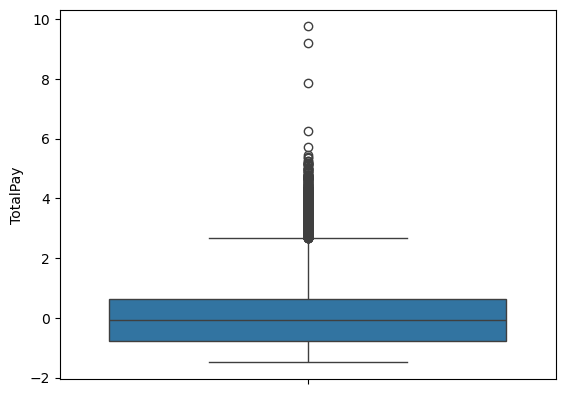

In [77]:
sns.boxplot(dt['TotalPay'])

In [79]:
q1 = dt['TotalPay'].quantile(0.25)
q2 = dt['TotalPay'].quantile(0.75)
iqr = q2 - q1
print(q1)
print(q2)
print(iqr)

-0.7641188757437168
0.6151022553975888
1.3792211311413056


In [80]:
iqr_upper_limit = q2 + 1.5 * iqr
iqr_lower_limit = q1 - 1.5 * iqr
print("Upper limit", iqr_upper_limit)
print("Lower limit", iqr_lower_limit)

Upper limit 2.6839339521095473
Lower limit -2.8329505724556756


In [81]:
dt['TotalPay'] = np.where(
dt['TotalPay'] > iqr_upper_limit,
iqr_upper_limit,
np.where(
dt['TotalPay'] < iqr_lower_limit,
iqr_lower_limit,
dt['TotalPay']
)
)

<Axes: ylabel='TotalPay'>

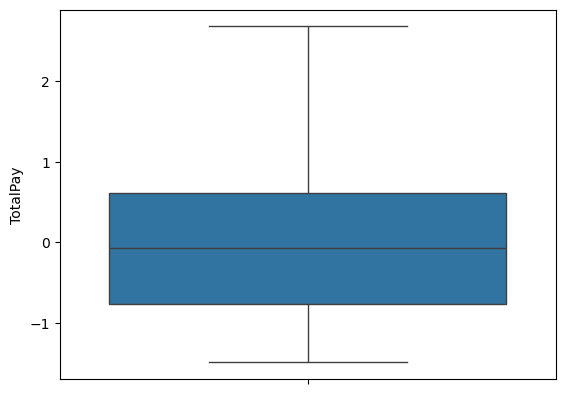

In [82]:
sns.boxplot(dt['TotalPay'])

<Axes: ylabel='Benefits'>

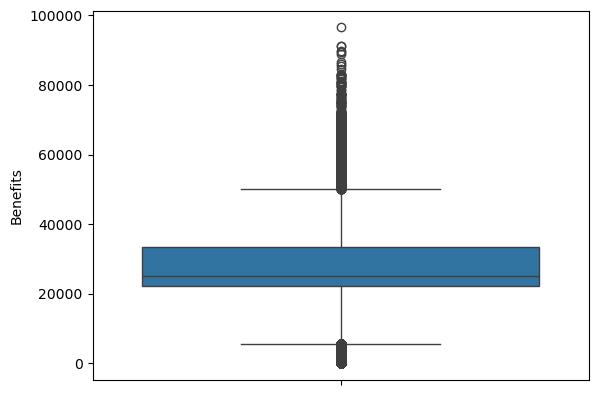

In [87]:
sns.boxplot(dt['Benefits'])

In [88]:
q1 = dt['Benefits'].quantile(0.25)
q2 = dt['Benefits'].quantile(0.75)
iqr = q2 - q1
print(q1)
print(q2)
print(iqr)

22341.4525
33468.98
11127.527500000004


In [89]:
iqr_upper_limit = q2 + 1.5 * iqr
iqr_lower_limit = q1 - 1.5 * iqr
print("Upper limit", iqr_upper_limit)
print("Lower limit", iqr_lower_limit)

Upper limit 50160.271250000005
Lower limit 5650.161249999994


In [90]:
dt['Benefits'] = np.where(
dt['Benefits'] > iqr_upper_limit,
iqr_upper_limit,
np.where(
dt['Benefits'] < iqr_lower_limit,
iqr_lower_limit,
dt['Benefits'])
)

<Axes: ylabel='Benefits'>

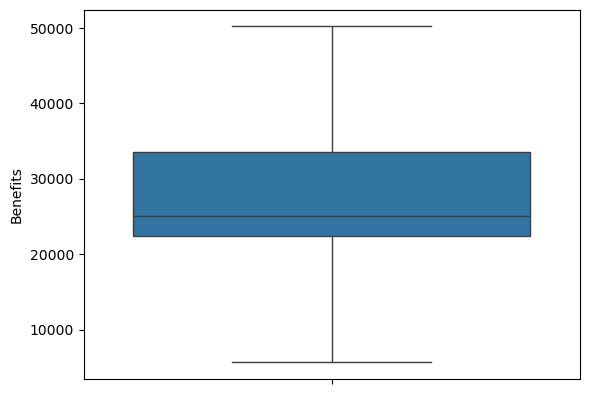

In [91]:
sns.boxplot(dt['Benefits'])

<Axes: xlabel='TotalPay', ylabel='Count'>

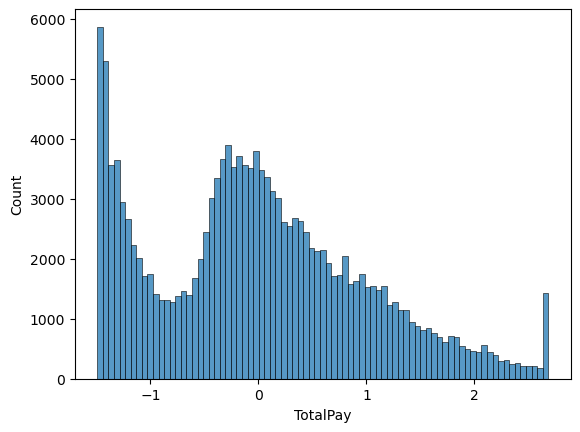

In [83]:
sns.histplot(dt['TotalPay'],fill=True)

<Axes: >

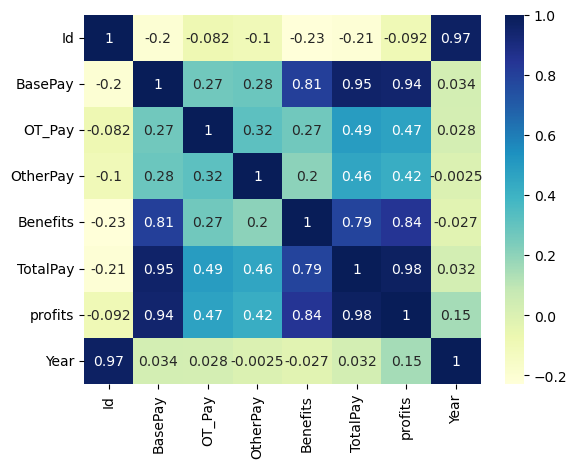

In [84]:
sns.heatmap(dt.corr(numeric_only=True),cmap="YlGnBu", annot=True,linecolor='white')

<Axes: ylabel='Year'>

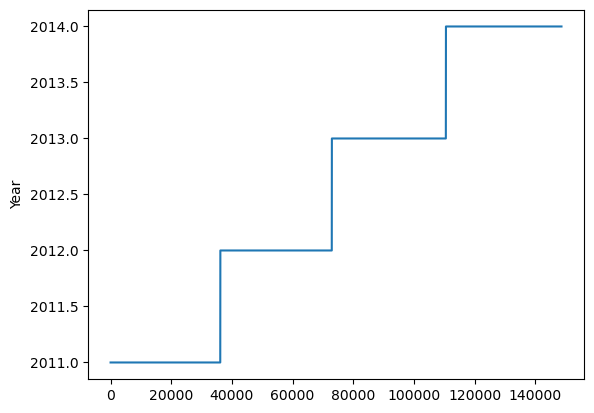

In [85]:
sns.lineplot(dt['Year'])

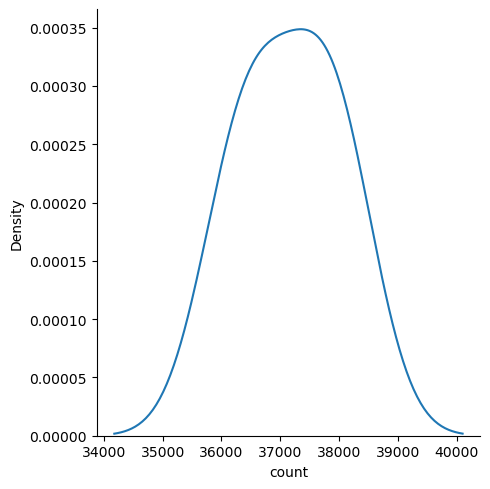

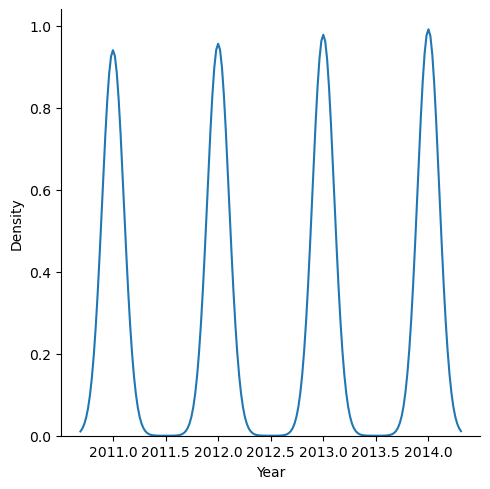

In [86]:
sns.displot(dt["Year"].value_counts(),kind='kde')
sns.displot(dt['Year'],kind='kde')